# 02. 데이터 전처리 기초 part2

## 범주형 데이터

범주형 데이터는 'A', 'B', 'C'와 같이 종류를 표시하는 데이터를 말한다. 카테고리(category) 데이터라고도 부른다. 다음과 같은 데이터는 모두 범주형 데이터의 예다.

* 성별: 남자, 여자
* 혈액형: A, B, O, AB
* 주소: 서울, 부산, 대전, ...

반드시 문자만 범주형 데이터인 것은 아다. 예를 들어 소속을 나타내는 '1반', '2반', '3반'과 같은 데이터는 숫자로 표현된 값이지만 '1'이라는 글자를 이용한 것 뿐이지 숫자로서의 의미는 없다. 즉, '2'라는 값이 '1'이라는 값보다 2배 더 크다는 뜻이 아니므로 이 경우는 범주형 값으로 보아야 한다.

### 범주형 데이터의 변형 

대부분의 데이터 분석 모형은 숫자만 입력으로 받을 수 있기 때문에 범주형 데이터는 숫자로 변환해야 한다. 범주형 데이터를 숫자로 변환하기 위해 더미변수화 방법을 사용한다.

**더미변수(dummy variable)**는 0 또는 1만 가지는 값으로 어떤 특징이 존재하는가 존재하지 않는가를 표시한다. 다음과 같은 명칭으로도 불린다.

* 이진지시자(Boolean indicator)
* 이진변수(binary variable)
* 지시변수(indicator variable)
* 설계변수(design variable)
* 처치(treatment)

카테고리값을 더미변수화하면 복수의 더미변수 벡터로 표시한다. 예를 들어 성별 $x$는 2개의 더미변수 $(d_1, d_2)$로 표현할 수 있다. 더미변수 $d_1$는 남자면 1, 여자면 0이 되는 값이다. 더미변수 $d_2$는 남자면 0, 여자면 1이 되는 값이다.

$$
\begin{align}
\begin{aligned}
x = \text{남자} & \;\;\rightarrow\;\; d_1=1, d_2=0 \\
x = \text{여자} & \;\;\rightarrow\;\; d_1=0, d_2=1
\end{aligned}
\end{align}
$$

혈액형은 4개의 더미변수 $(d_1, d_2, d_3, d_4)$로 표현할 수 있다. $d_1$은 혈액형이 A형인지 아닌지를 나타내는 더미변수이고 $d_2$은 혈액형이 B형인지 아닌지를 나타내는 더미변수, $d_3, d_4$는 각각 혈액형이 O형인지 아닌지를 나타내는 더미변수, AB형인지 아닌지를 나타내는 더미변수다.

$$
\begin{align}
\begin{aligned}
x = \text{A형}  & \;\;\rightarrow\;\; d_1=1, d_2=0, d_3=0, d_4=0 \\
x = \text{B형}  & \;\;\rightarrow\;\; d_1=0, d_2=1, d_3=0, d_4=0 \\
x = \text{O형}  & \;\;\rightarrow\;\; d_1=0, d_2=0, d_3=1, d_4=0 \\
x = \text{AB형} & \;\;\rightarrow\;\; d_1=0, d_2=0, d_3=0, d_4=1 \\
\end{aligned}
\end{align}
$$

위 예제들에서 볼 수 있듯이 $1$부터 $K$까지의 값을 가질 수 있는 범주형값은 $K$개의 더미변수 벡터로 표시할 수 있다. 각 더미변수는 특정한 하나의 카테고리값인가 아닌가를 나타내는 지시자(indicator)가 된다. 이런 식으로  $K$개의 값을 갖는 범주형 데이터를 $K$ 차원의 벡터로 표현하는 과정을 `One-Hot Encoding`이라고 한다

### pandas get_dummies를 사용한 더미변수화

pandas 패키지의 get_dummies 메소드는 데이터프레임의 문자열 범주값을 더미변수로 바꿔준다. 예를 들어 다음과 같이 성별을 나타내는 "Male", "Female"값 데이터가 있는 경우,

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

dataset = sns.load_dataset('titanic')
sex_data=dataset.sex  # sex 데이터에는 결측치가 존재하지 않음
sex_data


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

더미변수화를 위해 get_dummies 메소드의 인자로 `sex_data`를 넣어준다. 그리고 0과 1을 원소로 갖는 벡터가 만들어지는 것을 원하므로 `dtype`를 int로 설정해준다

In [19]:
pd.get_dummies(sex_data, dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


만일 `dtype`를 설정하지 않으면 벡터의 원소가 `True`, `False`의 값을 갖는 boolean 데이터형이 된다

In [14]:
pd.get_dummies(sex_data)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


다음은 혈액형 데이터를 더미변수로 바꾸는 예제 코드다.

In [15]:
df2 = pd.DataFrame(["A", "B", "AB", "O"], columns=["x"])
df2

,x
0,A
1,B
2,AB
3,O


이를 `get_dummies` 코드를 이용해 One-Hot Encoding을 수행하면 다음과 같은 데이터프레임이 나오게 된다

In [17]:
pd.get_dummies(df2)

,x_A,x_AB,x_B,x_O
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True


더미변수 벡터의 원소가 0과 1이 되기를 원한다면 똑같이 `dtype` 인자에 int를 넣어주면 된다

In [18]:
pd.get_dummies(df2, dtype=int)

,x_A,x_AB,x_B,x_O
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1


### 다중공선성 문제와 해결 방법

지금까지 설명한 더미변수 방식을 **풀랭크(full-rank)** 방식이라고 한다. 이 경우 문제가 발생하는데, 모든 더미변수 벡터에 대해 다중공선성이 존재하게 된다. 그 이유는 벡터의 $K$개 원소 중 1개는 1의 값을 갖고 나머지는 0의 값을 가지므로 벡터의 모든 원소를 더하면 항상 1이 되기 때문이다. 이러한 경우 더미변수 벡터의 각 원소가 feature로 쓰이게 되면 그 원소들 사이에서 다중공선성이 나타나게 된다. 
예를 들자면 앞서 혈액형 더미변수 벡터의 경우

$$
\begin{aligned}
x=A  & \;\;\rightarrow\;\;  d_1=1, d_2=0, d_3=0, d_4=0 \\
x=B  & \;\;\rightarrow\;\;  d_1=0, d_2=1, d_3=0, d_4=0 \\
x=AB & \;\;\rightarrow\;\;  d_1=0, d_2=0, d_3=1, d_4=0 \\
x=O  & \;\;\rightarrow\;\;  d_1=0, d_2=0, d_3=0, d_4=1 \\
\end{aligned}
$$

이므로 $d_1+d_2+d_3+d_4=1$이 항상 성립하게 되어 다중공선성이 나타나게 된다

이를 해결하는 방법은 하나의 값을 기준값으로 설정한 후, 나머지에 대해서만 더미변수화를 시켜주는 것이다. 예를 들어 $A$를 기준으로 더미변수화를 시키면

$$
\begin{aligned}
x=A  & \;\;\rightarrow\;\; d_1=0, d_2=0, d_3=0 \\
x=B  & \;\;\rightarrow\;\; d_1=1, d_2=0, d_3=0 \\
x=AB & \;\;\rightarrow\;\; d_1=0, d_2=1, d_3=0 \\
x=O  & \;\;\rightarrow\;\; d_1=0, d_2=0, d_3=1 \\
\end{aligned}
$$

와 같은 형태가 되어 다중공선성을 막을 수 있다.

이를 파이썬으로 구현하기 위해서는 `get_dummies`의 인자로 `drop_first`를 `True`로 주면 된다.

In [20]:
pd.get_dummies(df2, dtype=int, drop_first=True)

,x_AB,x_B,x_O
0,0,0,0
1,0,1,0
2,1,0,0
3,0,0,1


이 경우 기준 범주값인 `A`는 모든 더미변수가 0의 값을 가짐을 알 수 있다.

## 스케일링

### 조건수

행렬의 **조건수**(conditional number)는 가장 큰 고유치와 가장 작은 고유치의 비율을 뜻한다.  여기에서는 다음 연립방정식을 예로 들어 설명을 하겠다.

$$ Ax = b $$

이런 연립방정식이 있을 때 행렬 $A$의 조건수가 크면 상수벡터 $b$에 대한 해 $x$의 민감도가 커지고 따라서 계수행렬이나 상수벡터에 존재하는 오차가 해에 미치는 영향이 커진다. 

즉 입력 오차 $\Delta b$와 해의 변화 $\Delta x$ 에 대해 $$A(x+\Delta x)=b+\Delta b $$ 의 관계를 파악하는 것이 조건수의 개념이다. 이를 정리해보면 $$\Delta x=A^{-1}\Delta b $$를 얻게 된다. 이를 행렬의 norm의 개념을 이용해 정리하면 $AA^{-1}$행렬의 고유값 $\lambda$에 대해 $$ \text{condition number} = \dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}} $$의 결과를 얻게 된다.
 
(자세한 서술은 https://ghebook.blogspot.com/2021/03/matrix-norm-and-condition-number.html#google_vignette 링크를 참고해주세요)

회귀분석에서는 공분산행렬 $X^TX$의 가장 큰 고유치와 가장 작은 고유치의 비율이 된다.

$$ \text{condition number} = \dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}} $$

조건수는 가장 작은 경우의 예는 행렬 $A$가 단위 행렬인 경우다. 이 때 조건수의 값은 1이다.

$$ \text{cond}(I) = 1 $$

위와 동일한 선형방정식 $Ax=b$를 고려해보자. $A$가 단위행렬이고 $b$ 가 1만 원소로 갖는다면 

In [22]:
A = np.eye(4)
b = np.ones(4)
x = np.linalg.solve(A, b)
x

array([1., 1., 1., 1.])

여기서 $A$에 오차가 발생하는 경우를 생각해 보자. 데이터에 오차가 발생한 상황을 고려해 $A$에 약간의 오차 0.0001을 추가하면

In [42]:
A = np.eye(4)
b = np.ones(4)+0.0001
x = np.linalg.solve(A, b)
x

array([1.0001, 1.0001, 1.0001, 1.0001])

연립방정식의 해에도 동일한 수준의 오차인 0.0001이 발생하는 것을 확인할 수 있다.

이번에는 힐버트 행렬(Hilbert matrix)이 계수행렬인 경우를 고려해보자. 이 힐버트 행렬은 조건수가 매우 큰 행렬 중 하나이다.

In [28]:
import scipy.linalg as lin

A = lin.hilbert(4)
b = np.ones(4)
x = np.linalg.solve(A, b)
x

array([  -4.,   60., -180.,  140.])

In [31]:
np.linalg.cond(A)

15513.738738928138

여기서 $A$에 오차가 발생하는 경우를 생각해 보자. 데이터에 오차가 발생한 상황을 고려해 $A$에 약간의 오차 0.0001을 추가하면

In [43]:
A = lin.hilbert(4)+0.0001*np.eye(4)
b = np.ones(4)
x = np.linalg.solve(A, b)
x

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

완전히 다른 값이 나오는 것을 확인할 수 있다. 즉, **공분산행렬 $X^TX$의  조건수가 크면 회귀분석을 사용한 예측값도 오차가 커진다.**

### 회귀분석과 조건수

회귀분석에서 조건수가 커지는 경우는 크게 두 가지가 있다.

1. 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.
1. 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.

이를 독립변수의 분포모양으로 설명하면 다음 그림과 같다.

<center>
    
<img src="./조건수.png" width="1400px" height="700px">
    
</center>

따라서 데이터 간 스케일의 차이가 크다면 적절한 스케일링 작업을 진행해야 모델의 성능을 향상시킬 수 있다.

### 스케일링 방법

많이 사용되는 스케일링 방법은 `MinMax Scaler`와 `Standard Scaler`가 있으며, 이 외에도 `MaxAbs Scaler`, `Robust Scaler`, `Normalizer`가 있다.

#### MinMax Scaler

`MinMax Scaler`는 데이터의 최대값과 최소값을 기준으로 데이터를 정규화한다. 식으로 표현하면
$$X_{new}=\frac{X-X_{min}}{X_{max}-X_{min}}$$
의 과정을 거쳐 스케일링을 진행한다.

이때, 데이터의 최대값과 최소값을 기준으로 스케일링을 진행하므로 극단적인 이상치가 있다면 이에 영향을 받게 된다. 따라서 이상치를 제거하는 과정을 선행해야 한다.

스케일링을 위해 파이썬 `sklearn` 패키지에서 제공하는 켈리포니아 집값 데이터를 이용해보자

In [4]:
from sklearn.datasets import fetch_california_housing
datasets=fetch_california_housing()
df=pd.DataFrame(datasets['data'], columns=datasets.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


각 데이터 열에 대한 설명은 datasets의 DESCR을 이용해 확인할 수 있다.

In [5]:
print(datasets.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

`MinMax Scaler`는 sklearn.preprocessing 에서 불러올 수 있다.

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data_new=scaler.fit_transform(df)
df_new=pd.DataFrame(data_new, columns=datasets.feature_names)
df_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

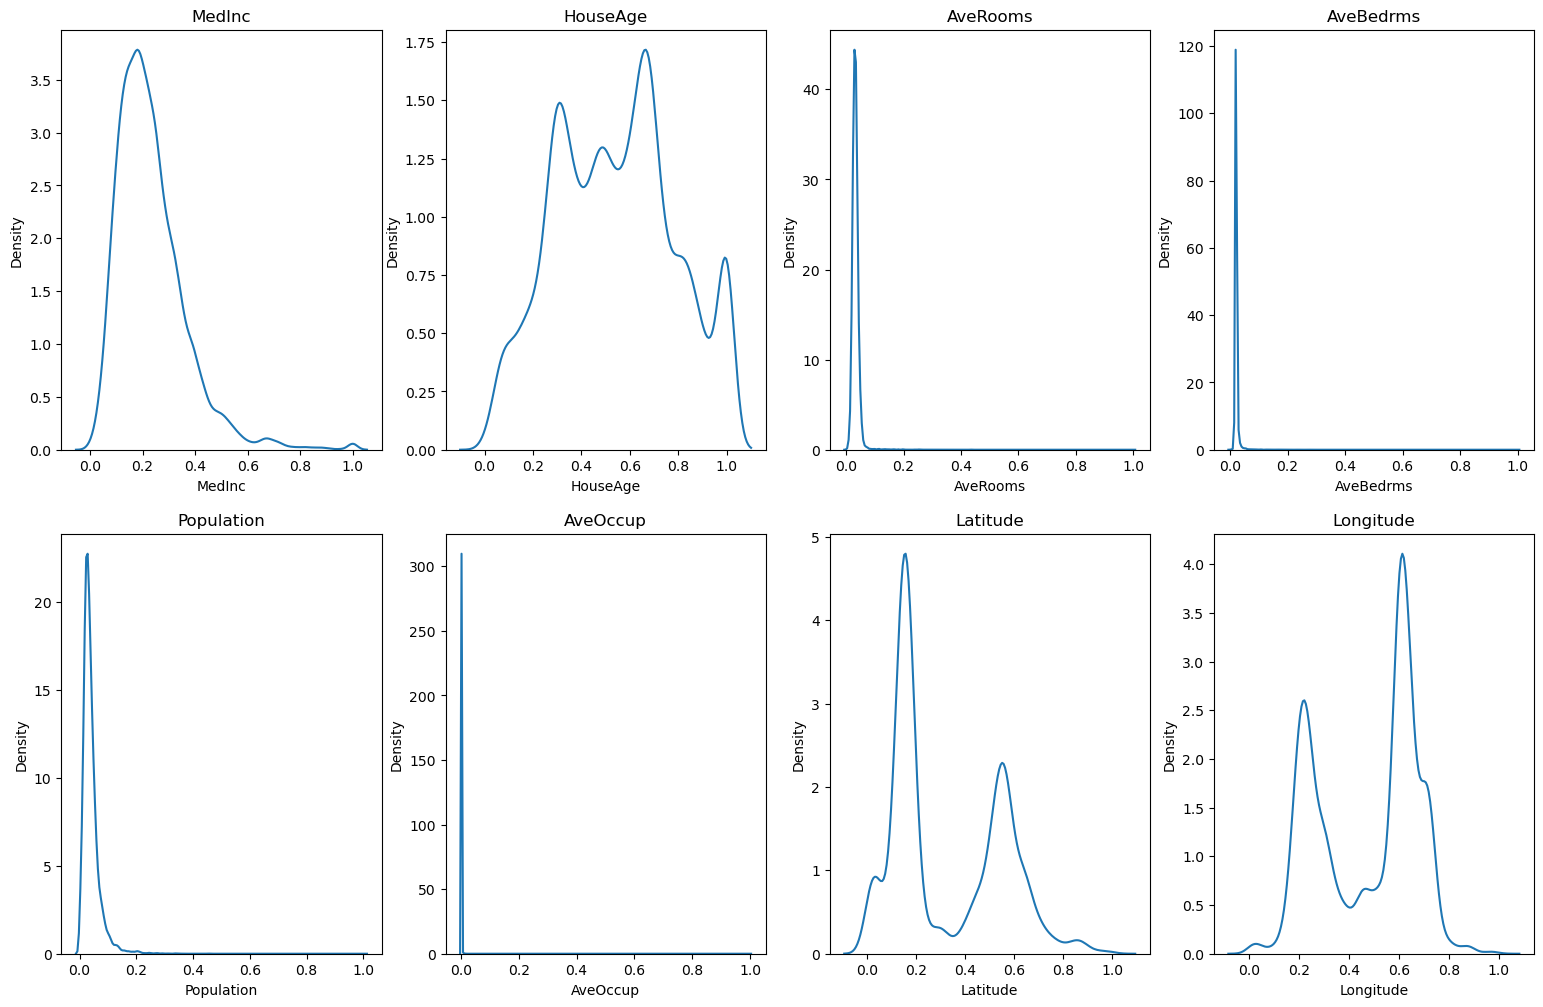

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,12))

for i in range(8):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_new[datasets.feature_names[i]])
    plt.title(datasets.feature_names[i])

plt.show()


결과를 보면 모든 feature의 값이 0과 1 사이에 있음을 알 수 있다. 하지만 몇몇 데이터는 매우 치우쳐진 모습을 보이는데, 이는 이상치를 제거하지 않고 스케일링을 수행하였기 때문이다.

#### Standard Scaler

`Standard Scaler`는 데이터에서 평균을 빼 준 값을 표준편차로 나누는 표준정규분포를 만드는 방법을 사용한다. 즉, 데이터의 표준화를 수행한다. 이를 수식으로 표현하면
$$X_{new}=\frac{X-\mu_{x}}{\sigma_{x}}$$
의 과정을 거쳐 스케일링을 진행한다.

이때, 표준화를 위해 평균과 분산을 사용하여 스케일링을 진행하므로 극단적인 이상치가 있다면 이에 영향을 받게 된다. 따라서 이상치를 제거하는 과정을 선행해야 한다.

스케일링을 위해 동일한 켈리포니아 집값 데이터를 이용해보자

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_new_standard=scaler.fit_transform(df)
df_new_standard=pd.DataFrame(data_new_standard, columns=datasets.feature_names)
df_new_standard

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

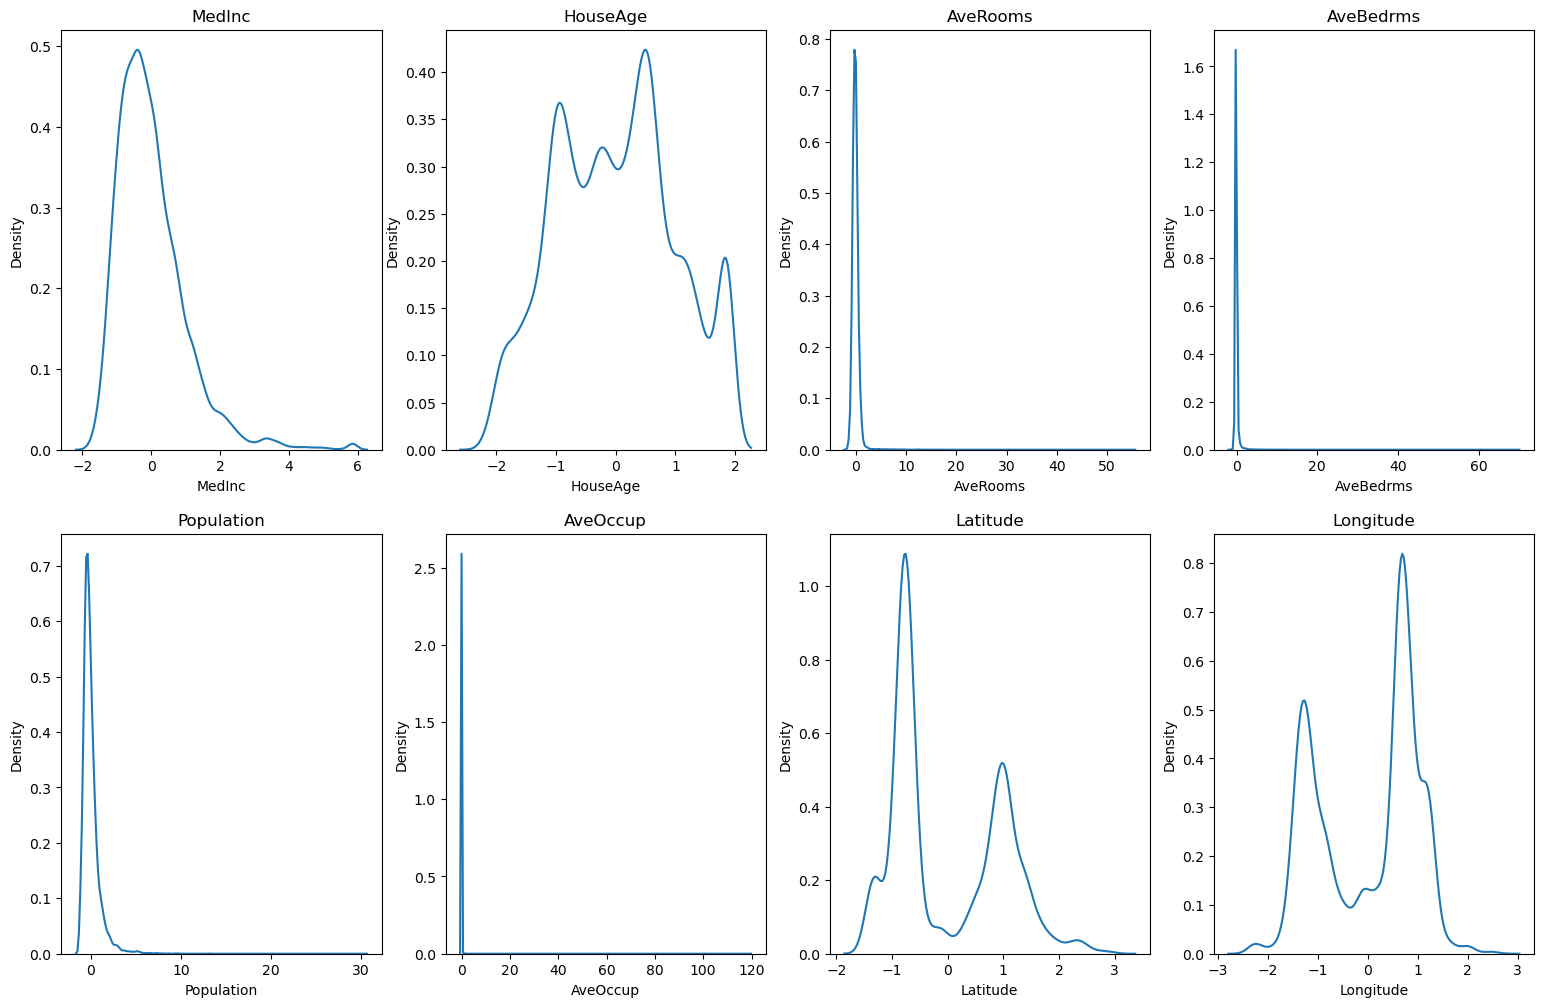

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,12))

for i in range(8):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_new_standard[datasets.feature_names[i]])
    plt.title(datasets.feature_names[i])

plt.show()

결과를 보면 minmaxscaler와 달리 모든 feature마다 다양한 값을 가지며, 몇몇 데이터는 매우 치우친 분포를 보임을 알 수 있다. 이는 이상치를 처리하지 않고 스케일링을 수행하였기 때문이다. 

#### MaxAbs Scaler

`MaxAbs Scaler`는 데이터를 데이터 최대값의 절대값으로 나눠 최대 절댓값이 1, 0이 0으로 스케일링된다. 절댓값이 0과 1 사이에 매핑되기 때문에 결과적으로는 -1과 1 사이로 스케일링된다. 이를 수식으로 표현하면
$$X_{new}=\frac{X}{max (\left \vert x \right \vert)}$$
의 과정을 거쳐 스케일링을 진행한다.

이 방법은 앞서 설명한 두 스케일러에 비해 많이 사용되는 스케일러는 아니다. 또한 절대값의 최대값을 이용하므로 극단적인 이상치가 있다면 이에 영향을 받게 된다. 따라서 이상치를 제거하는 과정을 선행해야 한다.

스케일링을 위해 동일한 켈리포니아 집값 데이터를 이용해보자

In [23]:
from sklearn.preprocessing import MaxAbsScaler

scaler=MaxAbsScaler()
data_new_maxabs=scaler.fit_transform(df)
df_new_maxabs=pd.DataFrame(data_new_maxabs, columns=datasets.feature_names)
df_new_maxabs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.555010,0.788462,0.049216,0.030053,0.009024,0.002055,0.902980,-0.982951
1,0.553423,0.403846,0.043959,0.028529,0.067289,0.001697,0.902503,-0.982871
2,0.483823,1.000000,0.058405,0.031510,0.013901,0.002254,0.902265,-0.983032
3,0.376204,1.000000,0.040994,0.031499,0.015638,0.002049,0.902265,-0.983112
4,0.256412,1.000000,0.044267,0.031734,0.015834,0.001755,0.902265,-0.983112
...,...,...,...,...,...,...,...,...
20635,0.104019,0.480769,0.035554,0.033268,0.023681,0.002059,0.941120,-0.973784
20636,0.170452,0.346154,0.043084,0.038624,0.009977,0.002512,0.941359,-0.974749
20637,0.113333,0.326923,0.036682,0.032879,0.028222,0.001870,0.939928,-0.974829
20638,0.124479,0.346154,0.037556,0.034401,0.020767,0.001708,0.939928,-0.975633


c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

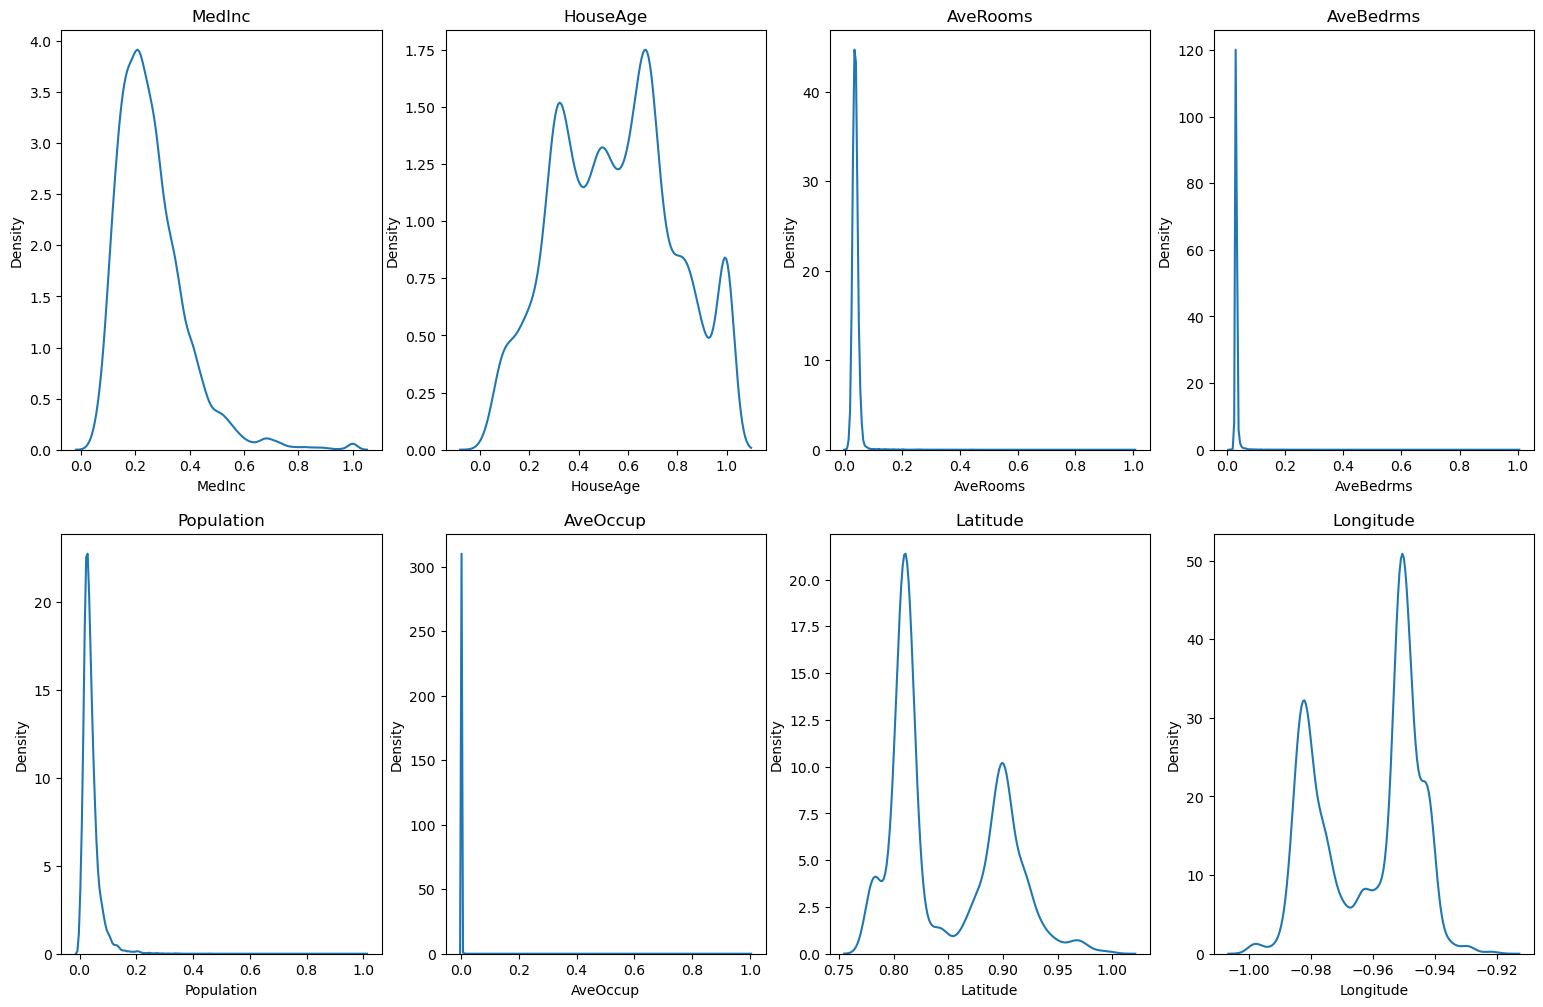

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,12))

for i in range(8):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_new_maxabs[datasets.feature_names[i]])
    plt.title(datasets.feature_names[i])

plt.show()

결과를 보면 양수만 있는 경우는 MinMax Scaler와 동일하며, 음수가 있다면 결과가 다른것을 알 수 있다. 또한 몇몇 데이터는 매우 치우친 분포를 보임을 알 수 있다. 이는 이상치를 처리하지 않고 스케일링을 수행하였기 때문이다. 

#### Robust Scaler

Robust Scaler는 다른 스케일러와 달리 사분위수(Quartile)을 이용해 스케일링을 진행한다. 따라서 중앙값과 IQR(InterQuartile Range)를 사용하므로 비교적 이상치의 영향을 덜 받는 장점이 있다. 수식으로 표현하면
$$X_{new}=\frac{X-Q_1(X)}{Q_3(X)-Q_1(X)}$$
의 과정을 거쳐 스케일링을 진행한다.

스케일링을 위해 동일한 켈리포니아 집값 데이터를 이용해보자

In [26]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
data_new_robus=scaler.fit_transform(df)
df_new_robus=pd.DataFrame(data_new_robus, columns=datasets.feature_names)
df_new_robus

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-0.986807
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-0.984169
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-0.989446
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-0.992084
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-0.992084
...,...,...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.113966,0.904821,-0.342217,-0.302057,1.380952,-0.686016
20636,-0.448655,-0.578947,0.549064,2.857330,-0.863539,0.357401,1.383598,-0.717678
20637,-0.841709,-0.631579,-0.014635,0.763126,-0.169510,-0.577676,1.367725,-0.720317
20638,-0.765007,-0.578947,0.062286,1.317744,-0.453092,-0.815121,1.367725,-0.746702


c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

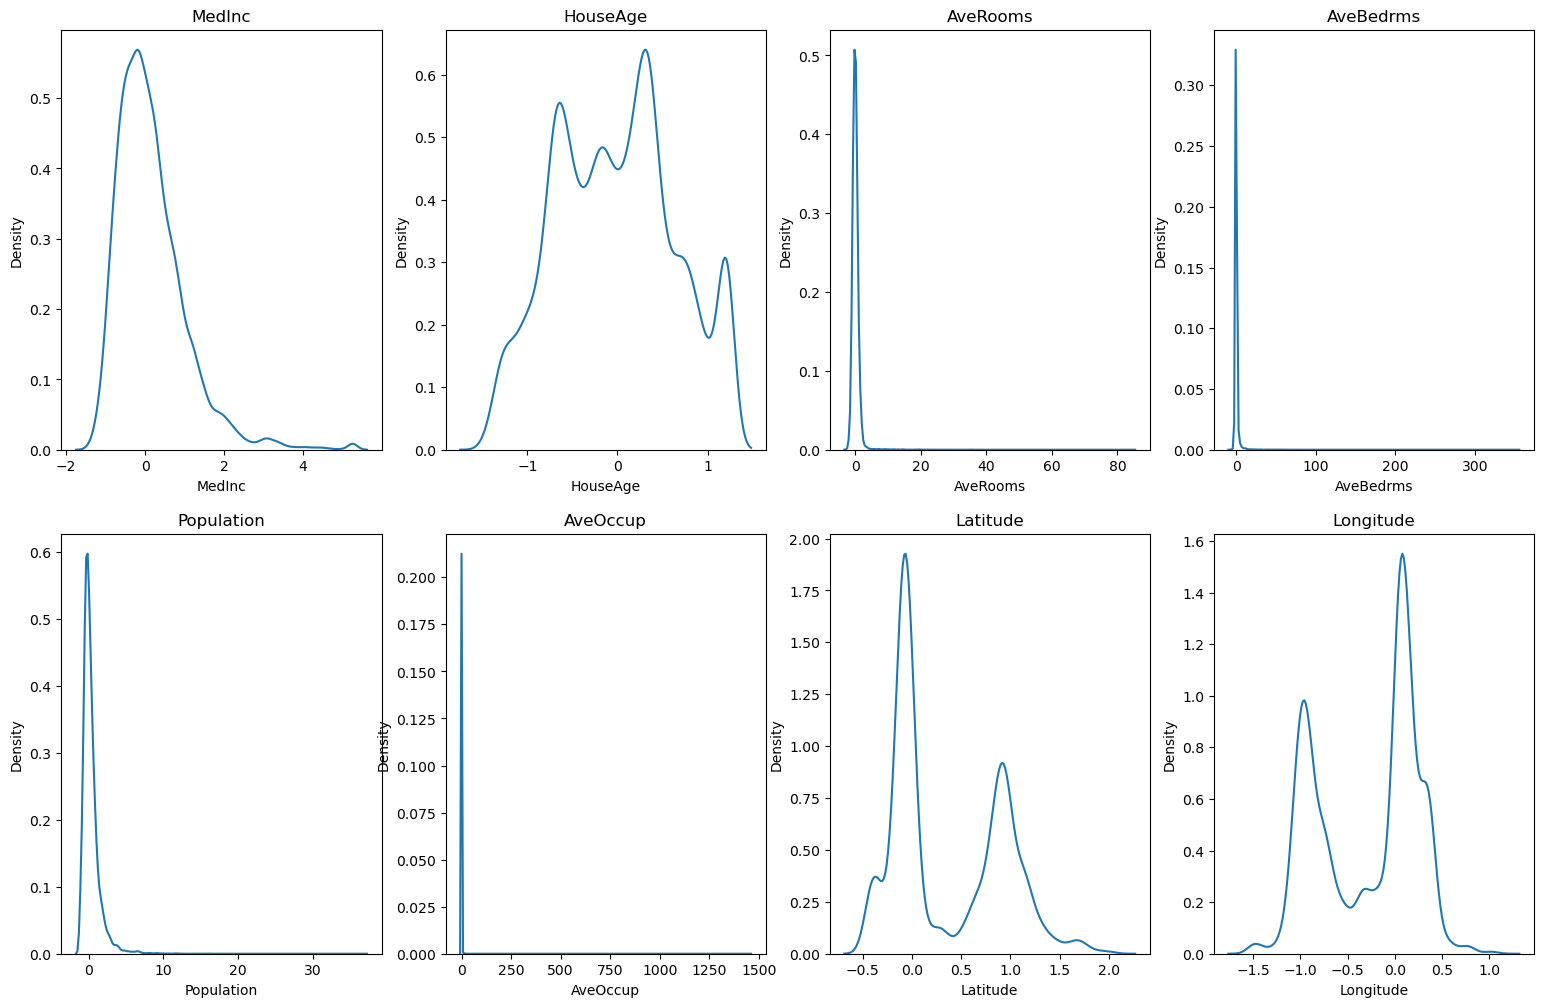

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,12))

for i in range(8):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_new_robus[datasets.feature_names[i]])
    plt.title(datasets.feature_names[i])

plt.show()

위의 스케일러들과 비교하면 이상치의 영향을 비교적 덜 받는다는 것을 확인할 수 있지만, Population, AveOccup을 보면 그래도 매우 심각한 이상치에는 영향을 받는 모습을 확인할 수 있다.

#### Normalizer

Normalizer는 feature, 즉 데이터프레임의 열에 대해 스케일링을 하는 다른 스케일러와 다르게 각 데이터들, 즉 데이터프레임의 각 행에 대해 스케일링을 적용한다. 한 행의 모든 feature들 사이의 유클리드 거리가 1이 되게 데이터값을 만들어준다. 이는 더 빠른 학습 속도와 과적합 확률의 감소라는 이점을 갖는다. 이를 수식으로 표현하면 다음과 같다.
$$X_{i, new}=\frac{X_i}{\sqrt{\sum_{j=1}^N X_j^2}}$$
(단, $N$은 feature의 갯수)

스케일링을 위해 동일한 켈리포니아 집값 데이터를 이용해보자

In [28]:
from sklearn.preprocessing import Normalizer

scaler=Normalizer()
data_new_norm=scaler.fit_transform(df)
df_new_norm=pd.DataFrame(data_new_norm, columns=datasets.feature_names)
df_new_norm

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.023848,0.117447,0.020007,0.002933,0.922391,0.007321,0.108510,-0.350136
1,0.003452,0.008734,0.002594,0.000404,0.998535,0.000877,0.015745,-0.050829
2,0.014092,0.100971,0.016093,0.002084,0.963106,0.005441,0.073495,-0.237359
3,0.009816,0.090449,0.010119,0.001866,0.970590,0.004432,0.065837,-0.212643
4,0.006612,0.089394,0.010799,0.001859,0.971303,0.003750,0.065069,-0.210162
...,...,...,...,...,...,...,...,...
20635,0.001825,0.029242,0.005902,0.001326,0.988384,0.002995,0.046179,-0.141637
20636,0.006753,0.047539,0.016147,0.003475,0.940212,0.008247,0.104295,-0.320121
20637,0.001675,0.016746,0.005128,0.001103,0.991926,0.002291,0.038840,-0.119405
20638,0.002483,0.023932,0.007086,0.001558,0.985188,0.002823,0.052424,-0.161300


c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

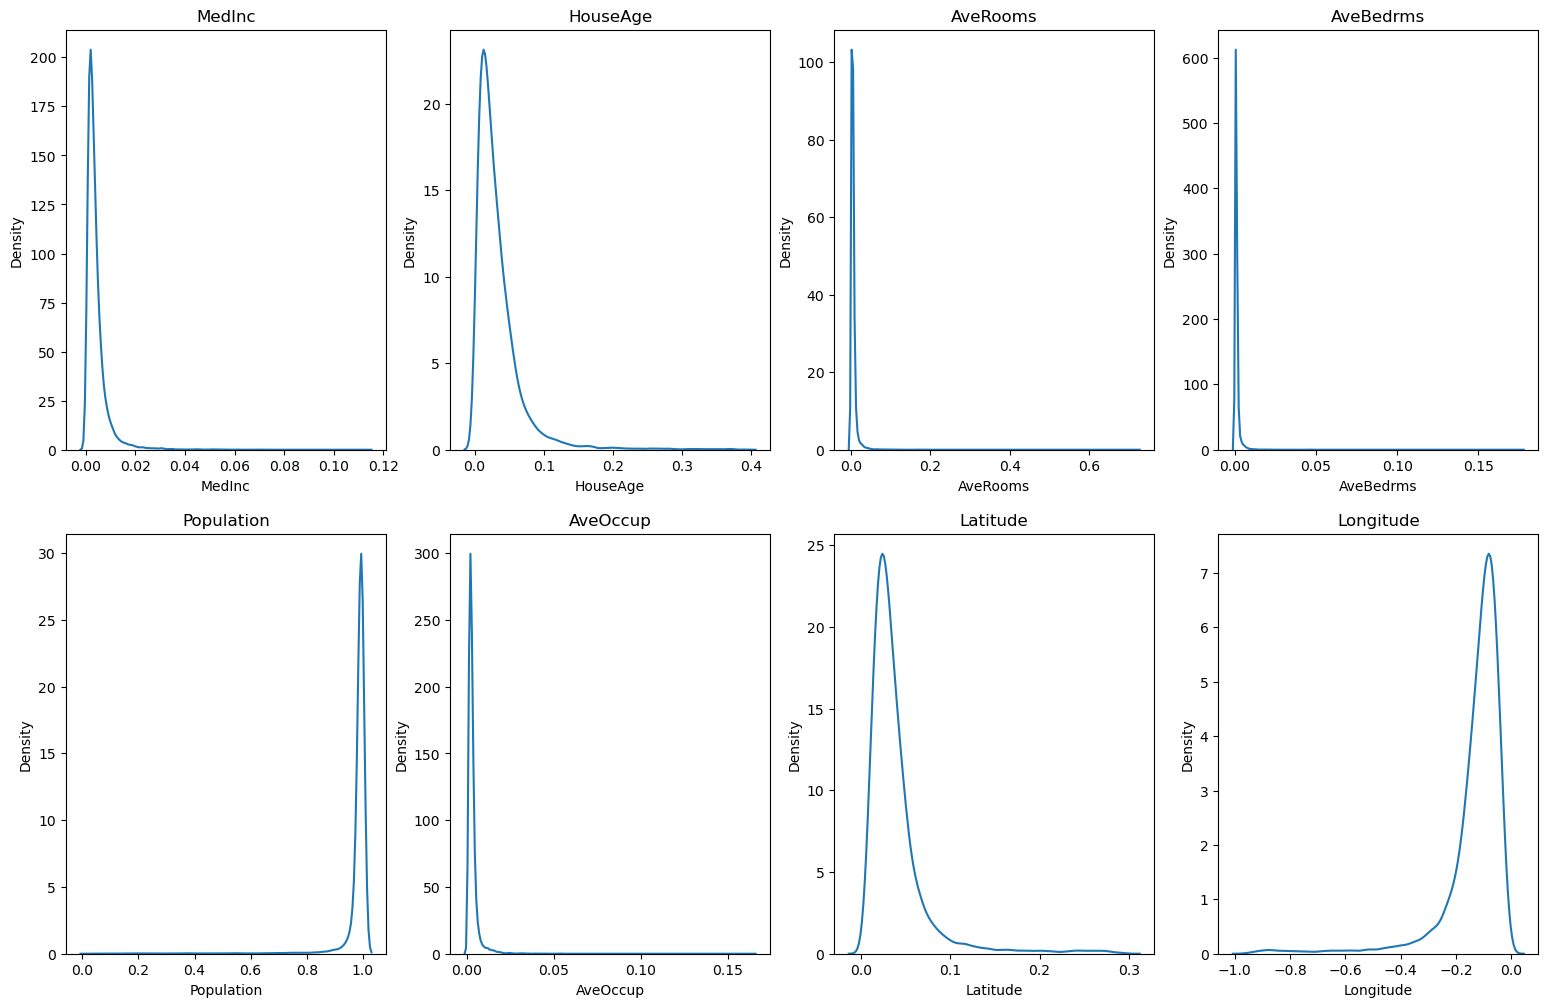

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,12))

for i in range(8):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_new_norm[datasets.feature_names[i]])
    plt.title(datasets.feature_names[i])

plt.show()

(-0.5, 3.0)

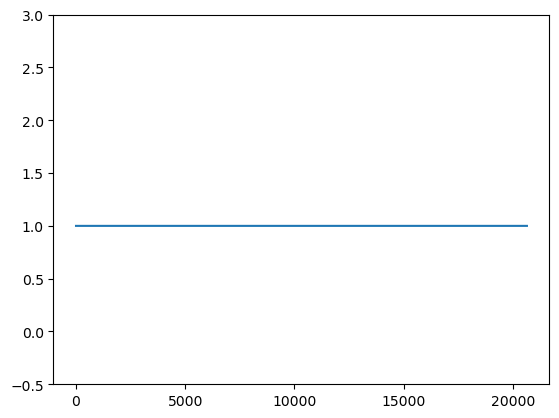

In [63]:
sum_lst=[]
for i in range(len(df_new_norm)):
    sum_lst.append(np.sum(df_new_norm.iloc[i, :]**2))

plt.plot(sum_lst)
plt.ylim(-0.5,3)

각 행 원소의 제곱의 합이 모두 1이 됨을 알 수 있다. (부동소수점 연산 중 오차로 인해 완벽하게 1이 아닌 데이터도 포함되어 있음에 유의)